In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
%matplotlib inline
%autosave 120

Autosaving every 120 seconds


In [2]:
#define constants 
D=100*u.pc.to(u.cm)*u.cm
N=1*u.cm**-3
INT_UNIT=u.erg/(u.s*(u.cm**2)*u.steradian) #unit for the intensity

The specific intensity for a a constant source function is given by 
$$
I= I_0 e^{-\tau}+ \int _{
    0} ^{\tau} e^{-(\tau - \tau')} S d\tau'
$$
$$
I= e^{-\tau}(I_0-S)+S
$$ and $\tau = n \sigma _\nu D$

In [3]:
def cross_section(t):
    return t/(N*D)

In [4]:
def gaussian(nu):
    """
    a gaussian 
    """
    center=10 #center this in the terahertz region
    var=.5
    norm=1/(np.sqrt(2*np.pi*var))
    #print (norm)
    gauss=norm*np.exp(-(nu-center)**2/(2*var))
    return gauss

In [5]:
#define functions used in here
def tau(nu, sigma0):
    """
    frequency dependent optical length assuming a gaussian cross-section
    """
    return N*D*gaussian(nu)*sigma0

In [6]:
def specific_intensity(i_0, t, s):
    """
    spefic intensity
    """
    return s+np.exp(-t)*(i_0-s)

#### (1). Column Density of the cloud 

In [7]:
print (N*D)

3.085677581467191e+20 1 / cm2


Cross-sections for $\tau=10^{-3}$, $\tau=1$, $\tau=10^3$

In [8]:
print (cross_section(10**-3), cross_section(1), cross_section(10**3))

3.2407792894697563e-24 cm2 3.2407792894697564e-21 cm2 3.2407792894697562e-18 cm2


#### (2). Write a program that takes as input $\sigma _\nu$, $I _\nu(0)$ and $S_\nu$ and calculates the specific intensity at $s = D$, i.e.  $I _\nu(D)$,
 I'using the analytic expression beacause the source function is constant

In [9]:
nu0=10.0**12  #pick a frequency
sgma=cross_section(10**-3) #pick a cross-section from the gaussian 
i0=100*INT_UNIT #pick an I_0
s0=10*INT_UNIT #pick a source function
t=tau(nu0, sgma)#calculate the total optical depth
print ('specific intensity {}'.format(specific_intensity(i0, t, s0)))

specific intensity 100.0 erg / (cm2 s sr)


#### (3). Plot a a Gaussian cross-section

In [10]:
freqs=freqs=np.linspace(1, 15, 1000)
#calculate sigma_0 for all three scenarios in (1)
sigmas0s=cross_section([10**-3, 1, 10**3])
sigmas=np.array([gaussian(freqs)*sigma0 for sigma0 in freqs])

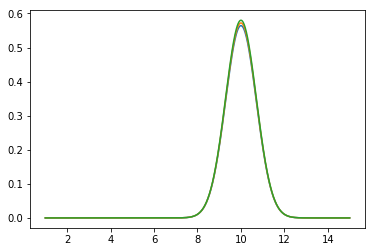

In [11]:
fig, ax=plt.subplots()
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.plot(freqs, sigmas[0])
ax.plot(freqs, sigmas[1])
ax.plot(freqs, sigmas[2])

In [12]:
#sigmas

In [13]:
#comment I wasn't able to separate the three curves but you can see the small spread at nu=10

#### (4) Reproduce the figures from the handout

In [14]:
#case by case 
#a) tau >>1
ia=10.0*INT_UNIT #pick an I_0
sa=10.0*INT_UNIT #pick a source function
ta=tau(freqs, cross_section(10**36))#calculate the total optical depth
ia=specific_intensity(ia, ta, s0)

#b) I_0=0, tau<1
ib0=0.0*INT_UNIT #pick an I_0
sb=10.0*INT_UNIT #pick a source function
tb=tau(freqs, cross_section(10**-3))#calculate the total optical depth
ib=specific_intensity(ib0, tb, sb)

#c) 
ic0=2.0*INT_UNIT #pick an I_0
sc=3.0*INT_UNIT #pick a source function
tc=tau(freqs, cross_section(10**-3))#calculate the total optical depth
ic=specific_intensity(ic0, tc, sc)

#d) 
id0=10.0*INT_UNIT #pick an I_0
sd=3.0*INT_UNIT #pick a source function
td=tau(freqs, cross_section(10**-3))#calculate the total optical depth
i_d=specific_intensity(id0, td, sd)

#e) 
ie0=1.0*INT_UNIT #pick an I_0
se=30.0*INT_UNIT #pick a source function
te=tau(freqs, cross_section(10**3))#calculate the total optical depth
ie=specific_intensity(ie0, te, se)

#f) 
if0=10.0*INT_UNIT #pick an I_0
sf=3.0*INT_UNIT #pick a source function
tf=tau(freqs, cross_section(10**3))#calculate the total optical depth
i_f=specific_intensity(if0, tf, sf)

In [15]:
tf

<Quantity [3.74603671e-33, 4.81990522e-33, 6.19918195e-33, 7.97002499e-33,
           1.02426987e-32, 1.31582620e-32, 1.68970962e-32, 2.16897746e-32,
           2.78309107e-32, 3.56967938e-32, 4.57678403e-32, 5.86571617e-32,
           7.51469026e-32, 9.62344437e-32, 1.23191122e-31, 1.57636832e-31,
           2.01634759e-31, 2.57811639e-31, 3.29510344e-31, 4.20983430e-31,
           5.37638507e-31, 6.86349224e-31, 8.75849210e-31, 1.11723094e-30,
           1.42457717e-30, 1.81575991e-30, 2.31345087e-30, 2.94639898e-30,
           3.75104474e-30, 4.77355960e-30, 6.07242095e-30, 7.72166232e-30,
           9.81497408e-30, 1.24708749e-29, 1.58392315e-29, 2.01094737e-29,
           2.55209431e-29, 3.23759222e-29, 4.10560339e-29, 5.20428718e-29,
           6.59439457e-29, 8.35252955e-29, 1.05752472e-28, 1.33842010e-28,
           1.69326055e-28, 2.14133464e-28, 2.70691558e-28, 3.42053704e-28,
           4.32059240e-28, 5.45533863e-28, 6.88540587e-28, 8.68693942e-28,
           1.09555316e-27

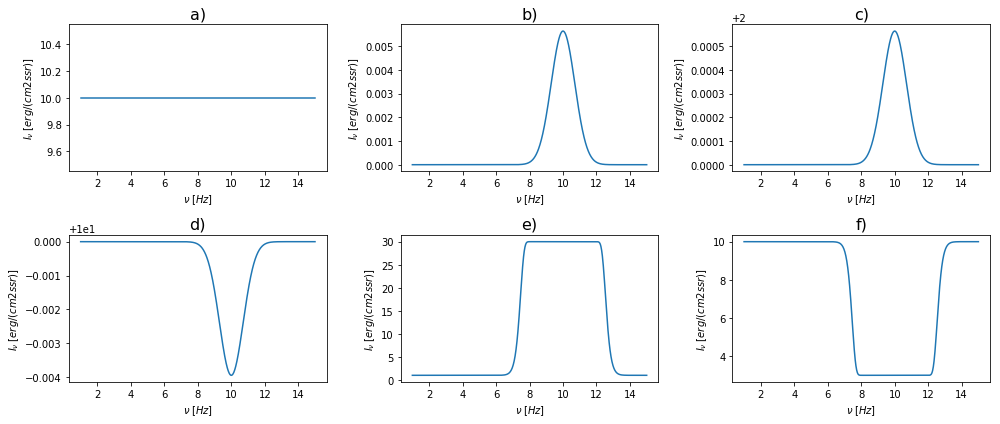

In [16]:
fig, ax=plt.subplots(ncols=3, nrows=2, figsize=(14, 6))
ax[0][0].plot(freqs, ia)
ax[0][0].set_title('a)', fontsize=16)
ax[0][1].plot(freqs, ib)
ax[0][1].set_title('b)', fontsize=16)
ax[0][2].plot(freqs, ic)
ax[0][2].set_title('c)', fontsize=16)

ax[1][0].plot(freqs, i_d)
ax[1][0].set_title('d)', fontsize=16)
ax[1][1].plot(freqs, ie)
ax[1][1].set_title('e)', fontsize=16)
ax[1][2].plot(freqs, i_f)
ax[1][2].set_title('f)', fontsize=16)

#automatically set all labels
xlabel= lambda axi: axi.set_xlabel(r'$\nu \;[Hz]$')
ylabel= lambda axi: axi.set_ylabel(r'$I_\nu \;[{}]$'.format(INT_UNIT))

vfunc1 = np.vectorize(xlabel)
vfunc2 = np.vectorize(ylabel)

vfunc1(ax)
vfunc2(ax)

plt.tight_layout()